![title](lab20.png)

# เปรียบเทียบ algorithm LinearRegression , DecisionTreeRegressor , RandomForestRegressor

- เอกสารประกอบ
https://www.kaggle.com/code/subhradeep88/house-price-predict-decision-tree-random-forest
- https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [1]:
# ทำนายราคาบ้านใน King County , USA

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [5]:
# ส่วน EDA Load the Data
dataset = pd.read_csv("kc_house_data.csv")
dataset.sample(5)

id             date     price  bedrooms  bathrooms  \
3783   3329510850  20150306T000000  286950.0         4       2.50   
6611   1433500050  20141202T000000  549950.0         4       2.50   
4217   7349650490  20150507T000000  285000.0         3       1.75   
16924  2760200050  20140717T000000  226000.0         4       1.00   
14406  1562100220  20150501T000000  605000.0         6       2.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
3783          2080      9846     1.0           0     0  ...      7   
6611          2720     13500     1.0           0     0  ...      8   
4217          1600      7500     1.0           0     0  ...      7   
16924         1270      6459     1.5           0     0  ...      7   
14406         2610      9132     1.0           0     0  ...      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
3783         1240            840      1984             0    98001  47.3338   
6611         1510           1210      1969             0    98007  47.6191   
4217         1600              0      1998             0    98002  47.2831   
16924        1270              0      1918             0    98118  47.5441   
14406        1320           1290      1965             0    98007  47.6220   

          long  sqft_living15  sqft_lot15  
3783  -122.268           1890        7977  
6611  -122.145           2510       12350  
4217  -122.199           1620        7461  
16924 -122.273           1300        4100  
14406 -122.140           2170        8000  

[5 rows x 21 columns]

Dataset contains:**

Id: a notation for a house

Date: Date house was sold

Price: Price is prediction target

Bedrooms: Number of Bedrooms/House

Bathrooms: Number of bathrooms/House

Sqft_Living: square footage of the home

Sqft_Lot: square footage of the lot

Floors: Total floors (levels) in house

Waterfront: House which has a view to a waterfront

View: Has been viewed

Condition: How good the condition is ( Overall )

Grade: overall grade given to the housing unit, based on King County grading system

Sqft_Above: square footage of house apart from basement

Sqft_Basement: square footage of the basement

Yr_Built: Built Year

Yr_Renovated: Year when house was renovated

Zipcode: Zip

Lat: Latitude coordinate

Long: Longitude coordinate

Sqft_Living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

Sqft_Lot15: lotSize area in 2015(implies-- some renovations)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#Lets find out how many unique values are present in each column

for value in dataset:
    print('For {},{} unique values present'.format(value,dataset[value].nunique()))

For id,21436 unique values present
For date,372 unique values present
For price,4028 unique values present
For bedrooms,13 unique values present
For bathrooms,30 unique values present
For sqft_living,1038 unique values present
For sqft_lot,9782 unique values present
For floors,6 unique values present
For waterfront,2 unique values present
For view,5 unique values present
For condition,5 unique values present
For grade,12 unique values present
For sqft_above,946 unique values present
For sqft_basement,306 unique values present
For yr_built,116 unique values present
For yr_renovated,70 unique values present
For zipcode,70 unique values present
For lat,5034 unique values present
For long,752 unique values present
For sqft_living15,777 unique values present
For sqft_lot15,8689 unique values present


In [10]:
# Dropping of the particular column value
dataset = dataset.drop(['id','date'],axis=1)

In [20]:
dataset.sample(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
519     890000.0         4       3.25         3180    194278     2.0   
11008   190000.0         4       1.00         1190      7920     1.0   
15246  2300000.0         7       4.75         5310      8816     2.0   
16945   480000.0         4       2.50         2870     35757     2.0   
7364    749950.0         4       2.50         3340    123600     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
519             0     0          3     10        3180              0   
11008           0     0          3      6         890            300   
15246           0     0          3     10        3650           1660   
16945           0     0          4      9        2870              0   
7364            0     0          3     10        3340              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
519        2005             0    98059  47.4711 -122.084           2200   
11008      1951             0    98126  47.5305 -122.371           1140   
15246      2013             0    98004  47.6221 -122.208           2920   
16945      1977             0    98077  47.7568 -122.050           2700   
7364       2005             0    98053  47.6101 -121.955           3730   

       sqft_lot15  
519        178160  
11008        7920  
15246       10610  
16945       41221  
7364       123600

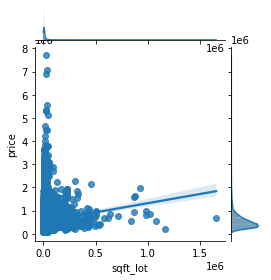

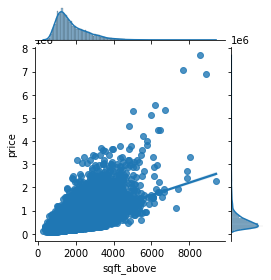

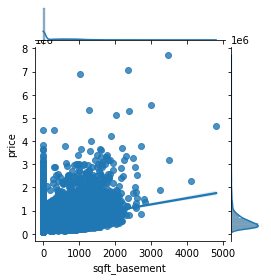

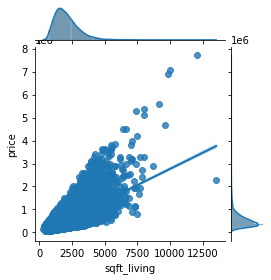

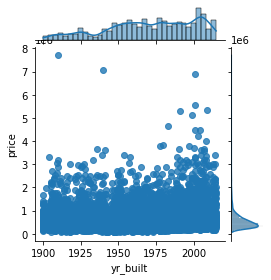

In [16]:
sns.jointplot(x='sqft_lot',y='price',data=dataset,kind='reg',height=4)
sns.jointplot(x='sqft_above',y='price',data=dataset,kind='reg',height=4)
sns.jointplot(x='sqft_basement',y='price',data=dataset,kind='reg',height=4)
sns.jointplot(x='sqft_living',y='price',data=dataset,kind='reg',height=4)
sns.jointplot(x='yr_built',y='price',data=dataset,kind='reg',height=4)

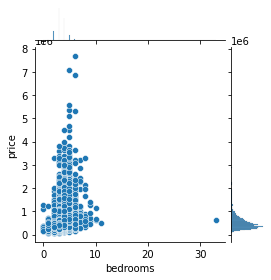

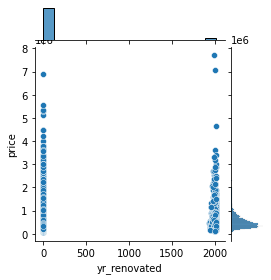

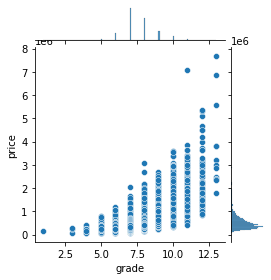

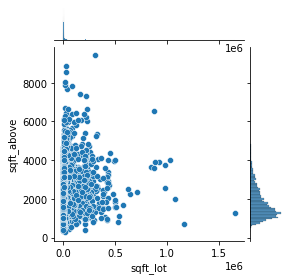

In [22]:
sns.jointplot(x='bedrooms',y='price',data=dataset,kind='scatter',height=4)
sns.jointplot(x='yr_renovated',y='price',data=dataset,kind='scatter',height=4)
sns.jointplot(x='grade',y='price',data=dataset,kind='scatter',height=4)
sns.jointplot(x='sqft_lot',y='sqft_above',data=dataset,kind='scatter',height=4)

<AxesSubplot:>

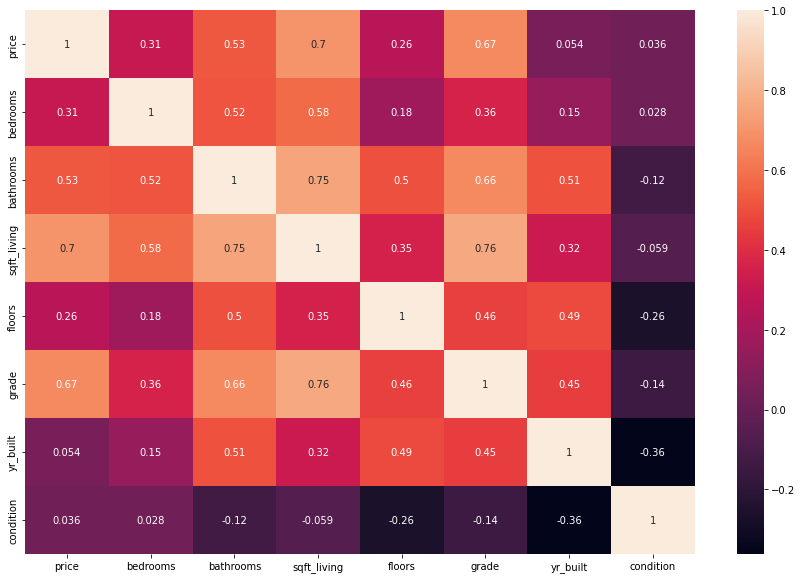

In [23]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition']
sns.heatmap(dataset[columns].corr(),annot=True)

# Model on the train data

In [24]:
# X(Independent variables) and y(target variables) 
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [27]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

![title](R2.png)
https://datarockie.com/blog/top-ten-machine-learning-metrics/

# Multiple Linear Regression

In [29]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [33]:
mlr_score

0.6962681311420084

# Decision Tree

In [34]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [35]:
decision_score

0.7248642444445476

# Random Forest Regression Model
- Random forest เป็นหนึ่งในกลุ่มของโมเดลที่เรียกว่า Ensemble learning ที่มีหลักการคือการเทรนโมเดลที่เหมือนกันหลายๆ ครั้ง (หลาย Instance) บนข้อมูลชุดเดียวกัน โดยแต่ละครั้งของการเทรนจะเลือกส่วนของข้อมูลที่เทรนไม่เหมือนกัน แล้วเอาการตัดสินใจของโมเดลเหล่านั้นมาโหวตกันว่า Class ไหนถูกเลือกมากที่สุด

- https://guopai.github.io/ml-blog10.html

In [61]:
# n_estimators = จำนวนต้นไม้ใน Random Forest

rf_regressor = RandomForestRegressor(n_estimators=20,random_state=0) 
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [62]:
rf_score

0.8715223948459881

# Calculate Model Score

In [63]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))


models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  70
Decision tree  Regression Model Score is  72
Random Forest Regression Model Score is  87


Model     Score  Explained Variance Score
2    Random forest Regression  0.871522                  0.844890
1               Decision Tree  0.724864                  0.708034
0  Multiple Linear Regression  0.696268                  0.573002

# ทดสอบการใช้งาน

In [64]:
dataset.head(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [65]:
dataset.loc[0][1:]

bedrooms             3.0000
bathrooms            1.0000
sqft_living       1180.0000
sqft_lot          5650.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                7.0000
sqft_above        1180.0000
sqft_basement        0.0000
yr_built          1955.0000
yr_renovated         0.0000
zipcode          98178.0000
lat                 47.5112
long              -122.2570
sqft_living15     1340.0000
sqft_lot15        5650.0000
Name: 0, dtype: float64

In [66]:
dataset.loc[0][0]

221900.0

In [67]:
rf_regressor.predict([dataset.loc[0][1:]])

array([230140.])

พยากรณ์ว่า 234570 ซึ่งราคาจริงอยู่ที่ 221900